<center><h1> Uvod u podatkovnu znanost  </h1></center>
<center><h2> Zimski semestar - 2022 </h2></center> 
<center><h3> Lab 6</h3></center> 
<center><h3> </h3></center> 
<center><h3> Statistička analiza podataka</h3></center> 

## Podaci

Koristit ćete skup podataka od 18403 glazbene recenzije izvučene iz Pitchfork baze, uključujući relevantne metapodatke kao što su autor recenzije, datum recenzije, godina izdanja ploče, rezultat recenzije i žanr, zajedno sa audio značajkama dotičnog albuma preuzetim iz Spotifyjevog API-ja. Podaci se sastoje od sljedećih stupaca:

| Stupac   | Opis  |
|----------|:-------------|
| `artist`           | Ime izvođača koji je stvorio album koji se pregledava. |
| `album`            | Naziv albuma koji se pregledava. |
| `recordlabel`      | Ime diskografske kuće koja je objavila album. |
| `releaseyear`      | Godina izlaska albuma. |
| `score`            | Ocjena koju je recenzent dao albumu na ljestvici od 0,0 do 10,0. |
| `reviewauthor`     | Ime autora koji je recenzirao album. |
| `genre`            | Žanr koji je albumu dodijelio Pitchfork. |
| `reviewdate`       | Datum objave recenzije.  |
| `key` | Procijenjeni ukupni glazbeni ključ pjesme. |
| `acousticness` | Mjera pouzdanosti od 0,0 do 1,0 je li album akustičan. |
| `danceability` | Koliko je album prikladan za ples na temelju kombinacije glazbenih elemenata uključujući tempo, stabilnost ritma, snagu takta i ukupnu pravilnost.
| `energy` | Percepcijska mjera intenziteta i aktivnosti. |
| `instrumentalness` | Predviđa sadrži li album vokale, od 0,0 do 1,0. |
| `liveness` | Detektira prisutnost publike, od 0,0 do 1,0. |
| `loudness` | Ukupna glasnoća albuma u decibelima (dB). |
| `speechiness` | Mjeri prisutnost izgovorenih riječi u albumu na skali od 0,0 do 1,0. |
| `valence` | Mjera od 0,0 do 1,0 koja opisuje glazbenu pozitivnost koju prenosi album. |
| `tempo` | Ukupni procijenjeni tempo albuma u otkucajima u minuti (BPM). |


In [3]:
pip install pandas matplotlib seaborn numpy

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker

import seaborn as sns
import numpy as np
import scipy
import itertools

# datetime operations
from datetime import datetime

# ttest and euclidean distance
from scipy.stats import ttest_ind

sns.set_style('whitegrid')

## Vježba 1: Inicijalna analiza?


**Task 1 (Inicijalna analiza)**

Kao dobar podatkovni znanstvenik, prvo što morate učiniti je dobro pogledati podatke koji su vam uručeni.

1. Učitajte podatke pomoću `pandas`. Identificirajte i uklonite duple recenzije, tj. dvije recenzije s albumima istog benda s istim imenom (zadržite prvo pojavljivanje). Ispišite broj redaka u vašem podatkovnom okviru.

2. Nacrtajte distribuciju godina izdavanja albuma i prosječnu ocjenu albuma po godini.

3. Za numeričke stupce izračunajte srednju vrijednost, medijan, minimalnu vrijednost i maksimalnu vrijednost. Osim toga, iscrtajte distribuciju za sve numeričke stupce na jednoj slici (po mogućnosti s višestrukim podcrtama). Vaša bi slika trebala biti najviše 14 inča široka i 14 inča dugačka.

3. Za kategoričke stupce navedite koliko različitih vrijednosti postoji u svakom stupcu. Ako postoji manje od 10 različitih vrijednosti za kategoriju, ispišite ih sve. Za stupac `genre` dodijelite vrijednost `'Other'` za albume gdje je vrijednost ili `'none'` ili `NaN`.

---

In [7]:
# 1.1

pitchfork = pd.read_csv('pitchfork.csv')
pitchfork = pitchfork.drop_duplicates(subset=["album", "artist"], keep="first")
print("Num. rows: " + str(len(pitchfork)))
pitchfork.head()

Num. rows: 16738


,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009.0,February 18 2009,Studio,Electronic,0.511917,0.499667,5.250000,-5.626583,0.031983,0.724917,0.024493,0.165367,0.555083,101.395167
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,Folk/Country,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003.0,July 17 2003,Badman,Rock,0.425400,0.433474,5.700000,-12.871000,0.028260,0.310325,0.224137,0.125150,0.451400,104.354200
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,Rap,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308


In [8]:
numeric_cols = ['score', 'releaseyear', 'danceability', 'energy', 'key',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']
for i in numeric_cols:
    pitchfork = pitchfork.loc[pitchfork[i] != -1].copy(deep=True)


In [9]:
pitchfork.head()

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009.0,February 18 2009,Studio,Electronic,0.511917,0.499667,5.250000,-5.626583,0.031983,0.724917,0.024493,0.165367,0.555083,101.395167
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,Folk/Country,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003.0,July 17 2003,Badman,Rock,0.425400,0.433474,5.700000,-12.871000,0.028260,0.310325,0.224137,0.125150,0.451400,104.354200
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,Rap,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308


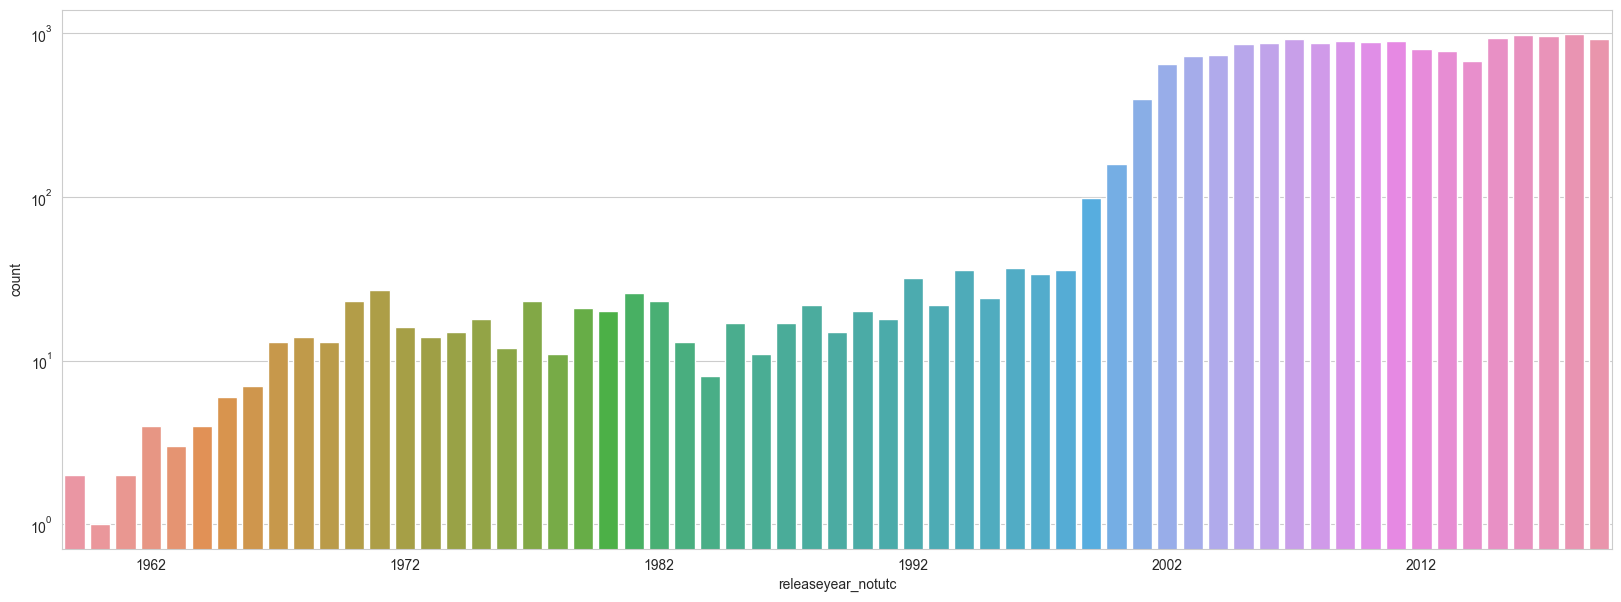

In [10]:
# 1.2

pitchfork['reviewdate'] = pd.to_datetime(pitchfork['reviewdate'], format='%B %d %Y')
pitchfork['releaseyear'] = pd.to_datetime(pitchfork['releaseyear'], format='%Y')
pitchfork['releaseyear_notutc'] = pitchfork.releaseyear.dt.year

# HINT: sns.countplot
plt.figure(figsize=(20,7))
ax = sns.countplot(data=pitchfork, x="releaseyear_notutc")
ax.set_yscale("log")
ax.set_xticks([3,13,23,33,43,53])
plt.show()

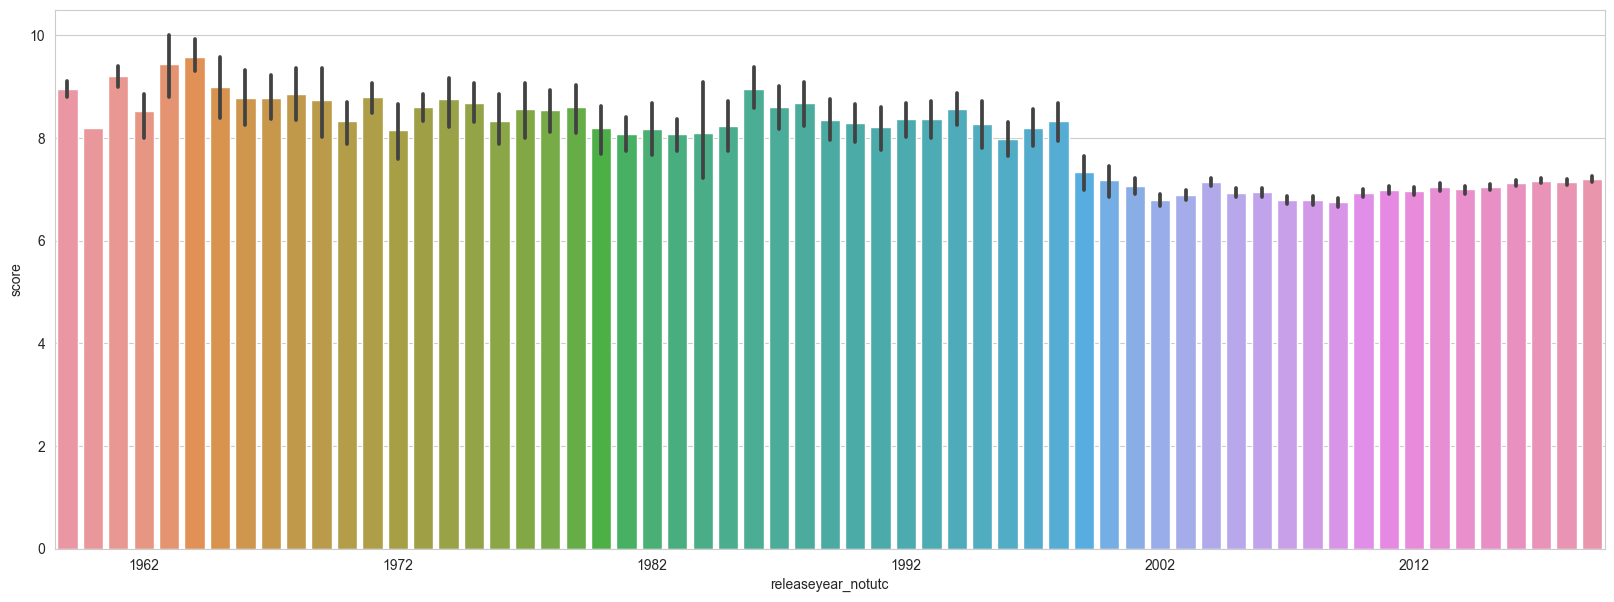

In [11]:
# HINT: sns.barplot
plt.figure(figsize=(20,7))
ax = sns.barplot(data=pitchfork, x="releaseyear_notutc", y='score')
ax.set_xticks([3,13,23,33,43,53])
plt.show()

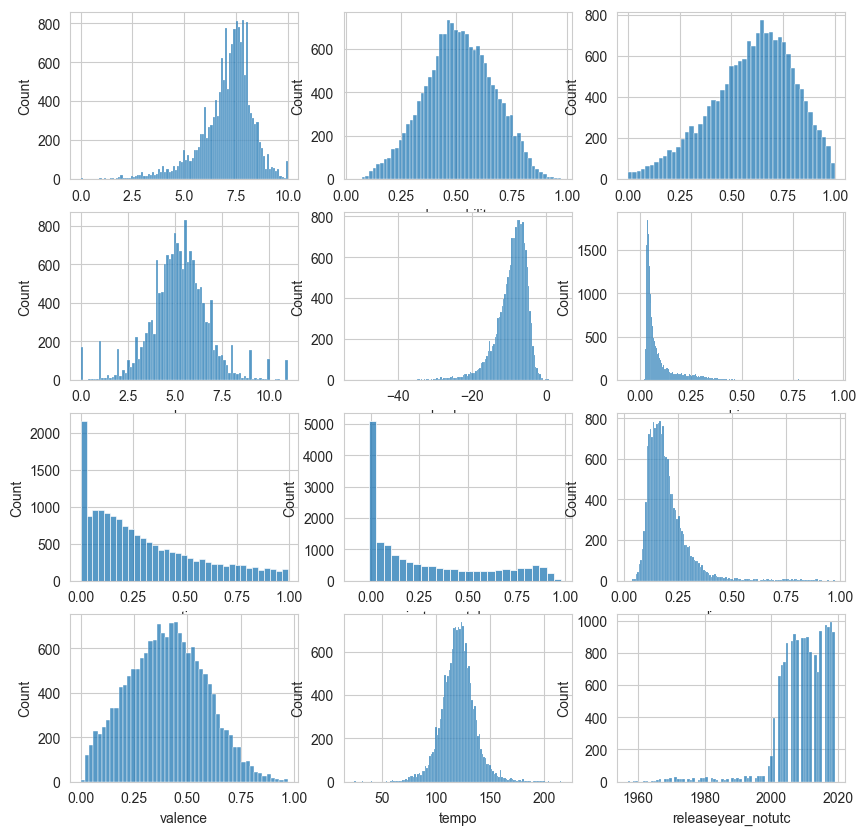

In [12]:
# 1.3

numeric_cols = pitchfork.select_dtypes(include=['int64','float64']).columns
numeric_cols
# CODE GOES HERE

fig, axes = plt.subplots(4,3, figsize=(10, 10))

for i, ax in zip(enumerate(numeric_cols), axes.flat):
    sns.histplot(ax=ax, data=pitchfork[i[1]])
    
pitchfork.describe().T
    
plt.show()

In [13]:
# 1.4 

#pitchfork['genre'].fillna('Other')
pitchfork['genre'].unique()
pitchfork['genre'].str.replace

<bound method StringMethods.replace of <pandas.core.strings.accessor.StringMethods object at 0x12863bd30>>

## Vježba 2: Sindrom drugog albuma

**Task 2 (Preliminarna analiza)**

Počinjete provođenjem neke preliminarne obrade podataka i analiza.

1. Napravite novi dataframe (od izvornih podataka s izbačenim duplikatima, isti kao što ste dobili nakon završetka zadatka 1.1) koji sadrži samo albume izvođača s dva ili više albuma i gdje godina izdanja nije prazna.
2. Napravite novi stupac `album_number` koji označava koliko je albuma izvođač producirao prije ovog (prije drugog albuma, izvođač je već producirao jedan album).
3. Izračunajte srednju vrijednost i standardnu pogrešku za srednju vrijednost rezultata prvog i drugog albuma u skupu podataka. Dodatno, nacrtajte dvije distribucije.
4. Koristite odgovarajuću metodu da odredite je li razlika u sredinama 1. i 2. albuma statistički signigikantna?
5. **Diskutirajte:** Sugeriraju li ove analize postojanje "sindroma drugog albuma"?

---

In [14]:
# 5.1

pitchfork = pd.read_csv('pitchfork.csv')
pitchfork = pitchfork.drop_duplicates(subset=["album", "artist"], keep="first")
pitchfork['reviewdate'] = pd.to_datetime(pitchfork['reviewdate'], format='%B %d %Y')
pitchfork['releaseyear'] = pd.to_datetime(pitchfork['releaseyear'], format='%Y')
pitchfork['releaseyear_notutc'] = pitchfork.releaseyear.dt.year

filtered_artists = pitchfork.groupby('artist').size().loc[lambda x : x > 1].index

two_ormore = pitchfork[pitchfork.artist.isin(filtered_artists)].copy()

In [15]:
# 5.2

# adding album number
two_ormore["album_number"] = two_ormore.sort_values(by=["artist", "releaseyear"]).groupby(by="artist").cumcount()
two_ormore

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,releaseyear_notutc,album_number
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005-01-01,2005-02-13,Water,Folk/Country,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647,2005,2
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004-01-01,2004-08-19,In the Red,Electronic,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500,2004,0
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018-01-01,2018-08-03,Warner Bros.,Rap,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308,2018,4
5,French Kicks,Swimming,Roque Strew,7.6,2008-01-01,2008-08-27,Vagrant,Electronic,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308,2008,3
6,Jessica Lea Mayfield,With Blasphemy So Heartfelt,Stephen M. Deusner,8.2,2008-01-01,2008-11-11,Polymer,Rock,0.447583,0.399083,6.500000,-8.402000,0.032267,0.694750,0.004033,0.123142,0.237933,111.549917,2008,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16768,Morrissey,California Son,Ben Hewitt,5.9,2019-01-01,2019-05-25,none,Rock,0.480417,0.657000,4.083333,-5.798833,0.052375,0.167543,0.003680,0.133358,0.404542,125.641000,2019,10
16769,Don Cherry,Brown Rice,Andy Beta,9.2,2019-01-01,2019-05-25,none,Jazz,0.624000,0.579000,7.000000,-8.389000,0.161000,0.348000,0.000032,0.204000,0.418000,182.968000,2019,1
16772,Flying Lotus,Flamagra,Philip Sherburne,7.8,2019-01-01,2019-05-24,none,Electronic,0.536750,0.652050,5.350000,-8.583750,0.134820,0.215916,0.519892,0.192075,0.353705,124.988200,2019,6
16773,YG,4REAL 4REAL,Sheldon Pearce,7.2,2019-01-01,2019-05-24,none,Rap,0.815429,0.556929,4.785714,-6.327643,0.259721,0.186476,0.000848,0.244586,0.361850,115.455857,2019,4


  album_number     score          
                     sem      mean
0            0  0.020731  7.298906
1            1  0.021295  7.043294


<AxesSubplot: xlabel='album_number', ylabel='score'>

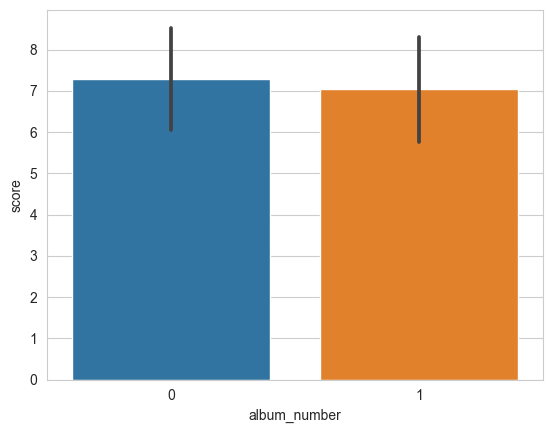

In [20]:
# 5.3
one_or_two = two_ormore[two_ormore["album_number"].isin([0,1])]

one_or_two_mean_sem = one_or_two.groupby(by="album_number").aggregate({"score": ["sem", "mean"]}).reset_index()
print(one_or_two_mean_sem)

a_sc = one_or_two[["album_number", "score"]].reset_index()
sns.barplot(data=a_sc, x="album_number", y="score", ci="sd")

In [21]:
# 5.4
ttest_ind(one_or_two[one_or_two["album_number"]==0]["score"],one_or_two[one_or_two["album_number"]==1]["score"])

Ttest_indResult(statistic=8.60083965713685, pvalue=9.625004156621532e-18)